In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  #to give whitegrid background for out plots.
%matplotlib inline


from pandas_datareader import data

from datetime import datetime

from __future__ import division

In [2]:
#We'll be answering the following questions along the way:

#1.) What was the change in price of the stock over time?
#2.) What was the daily return of the stock on average?
#3.) What was the moving average of the various stocks?
#4.) What was the correlation between different stocks' closing prices?
#4.) What was the correlation between different stocks' daily returns?
#5.) How much value do we put at risk by investing in a particular stock?
#6.) How can we attempt to predict future stock behavior?

In [3]:
#Let's use Yahoo and pandas to grab some data for some tech stocks.

In [4]:
tech_list=['AAPL','GOOG','MSFT','AMZN']


end=datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list:
    globals()[stock]=data.get_data_yahoo(stock,start,end)
    
    #Globals is used to take that stock tikker and converting it into a dataframe.
    

In [6]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-27,117.279999,114.540001,115.489998,116.599998,92276800.0,115.854843
2020-10-28,115.430000,111.099998,115.050003,111.199997,143937800.0,110.489349
2020-10-29,116.930000,112.199997,112.370003,115.320000,146129200.0,114.583015
2020-10-30,111.989998,107.720001,111.059998,108.860001,190272600.0,108.164314
2020-11-02,110.680000,107.320000,109.110001,108.769997,122866900.0,108.074875
...,...,...,...,...,...,...
2021-10-21,149.639999,147.869995,148.809998,149.479996,61421000.0,149.479996
2021-10-22,150.179993,148.639999,149.690002,148.690002,58839600.0,148.690002
2021-10-25,149.369995,147.619995,148.679993,148.639999,50720600.0,148.639999


In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,134.758577,132.012845,133.404348,133.435026,9.267233e+07,133.117097
std,10.936360,11.051245,11.002849,11.032429,2.972702e+07,11.192534
min,110.680000,107.320000,109.110001,108.769997,3.439393e+07,108.074875
25%,126.150002,123.089996,124.529999,124.970001,7.243410e+07,124.720978
50%,133.750000,130.929993,132.160004,132.029999,8.766880e+07,131.592834
75%,144.889999,142.649994,143.660004,143.759995,1.077601e+08,143.759995
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.690002


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-10-27 to 2021-10-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

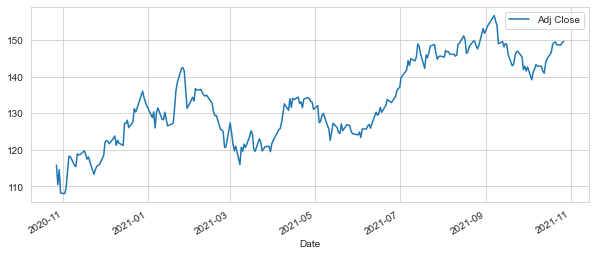

In [9]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

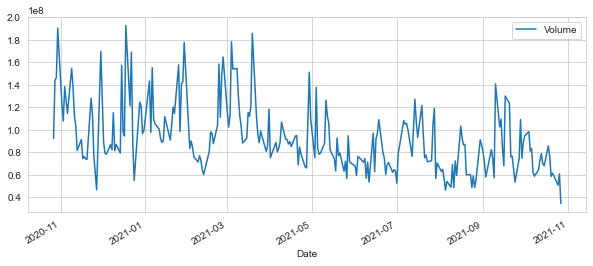

In [10]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.Series(AAPL['Adj Close'].rolling(window=ma).mean())
    

<AxesSubplot:xlabel='Date'>

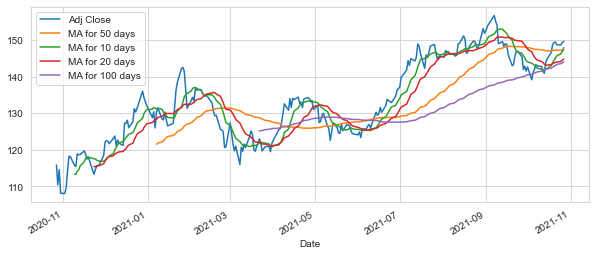

In [12]:
AAPL[['Adj Close','MA for 50 days','MA for 10 days','MA for 20 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))


<AxesSubplot:xlabel='Date'>

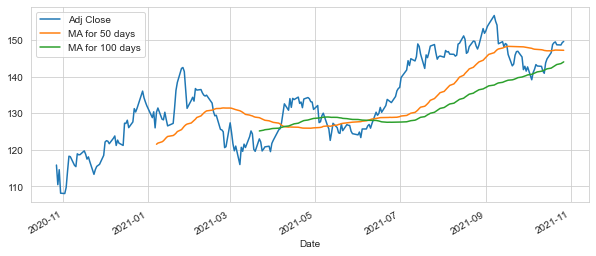

In [13]:
AAPL[['Adj Close','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))


In [14]:
# from the graph it can be noted that the APPL stock has a bullish trend
# since 50 day MA is crossing 100 days MA.

In [15]:
# We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.


<AxesSubplot:xlabel='Date'>

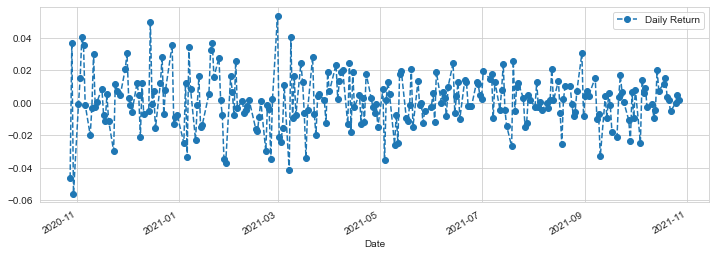

In [16]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

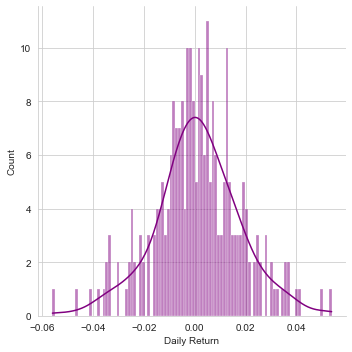

In [17]:
#Great, now let's get an overall look at the average daily return using a histogram. 
#We'll use seaborn to create both a histogram and kde plot on the same figure.

sns.displot(AAPL['Daily Return'].dropna(),color='purple',bins=100,kde=True)

<AxesSubplot:>

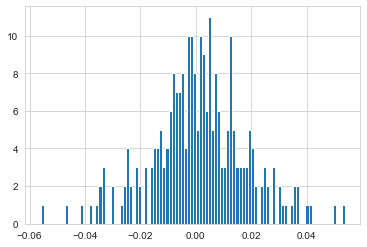

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
#Now lets analyze the returns of all the stocks in our list.
#Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df= data.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

In [21]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-27,115.854843,1604.260010,211.311005,3286.330078
2020-10-28,110.489342,1516.619995,200.837112,3162.780029
2020-10-29,114.583023,1567.239990,202.858551,3211.010010
2020-10-30,108.164307,1621.010010,200.629044,3036.149902
2020-11-02,108.074883,1626.030029,200.490295,3004.479980


In [22]:

tech_rets = closing_df.pct_change()

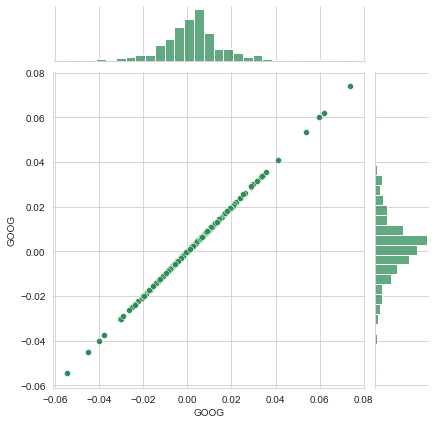

In [23]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

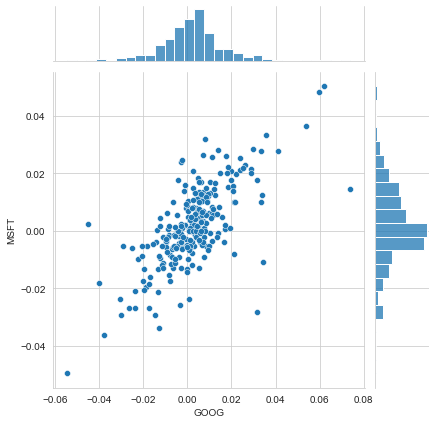

In [24]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

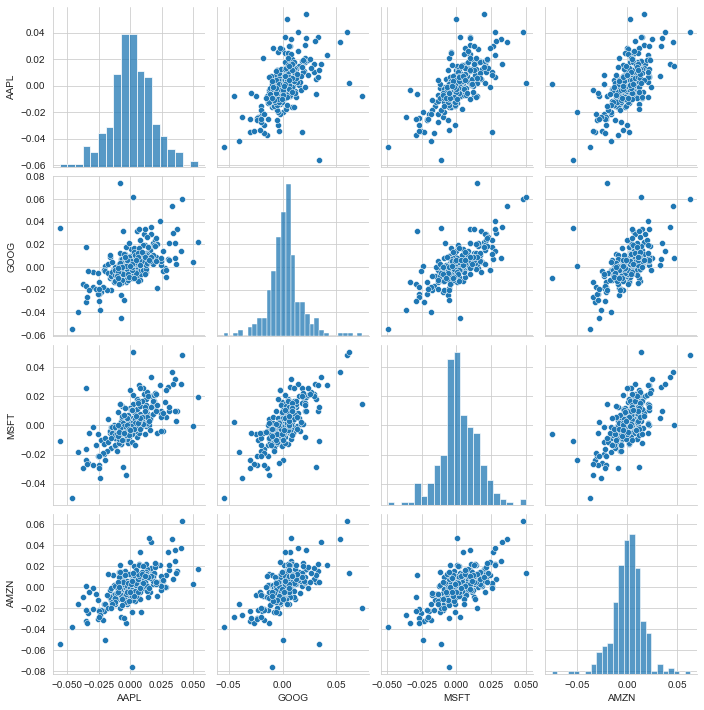

In [25]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

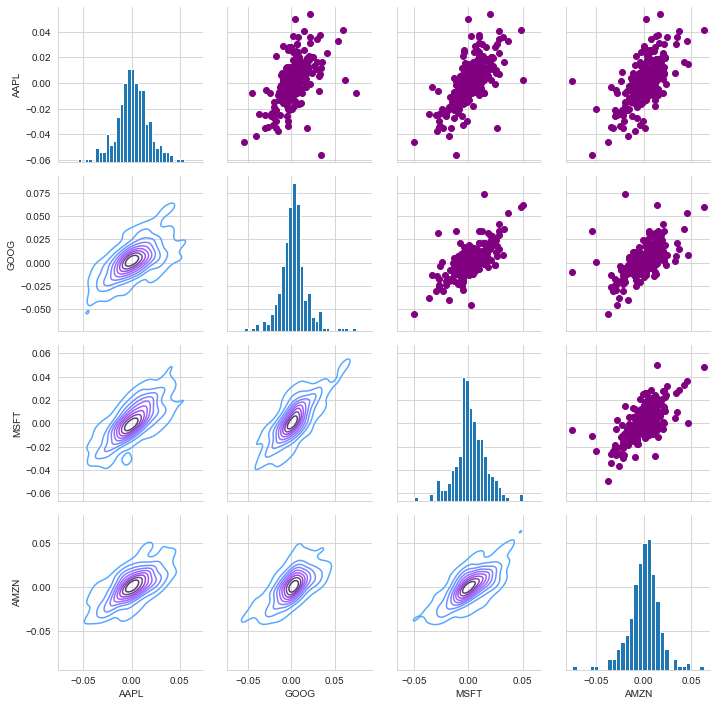

In [26]:
# Set up our figure by naming it returns_fig, call pairgrid on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

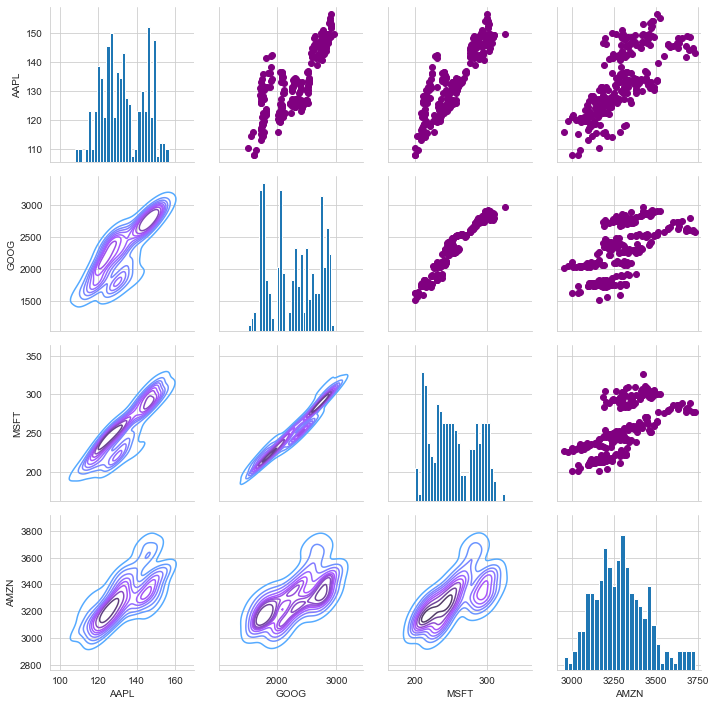

In [27]:
# lets do same thing for closing price.
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')


returns_fig.map_lower(sns.kdeplot,cmap='cool_d')


returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

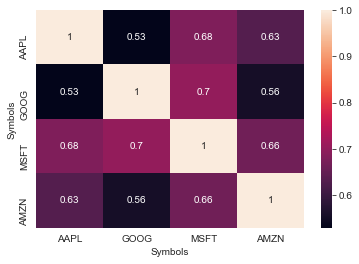

In [28]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr().dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

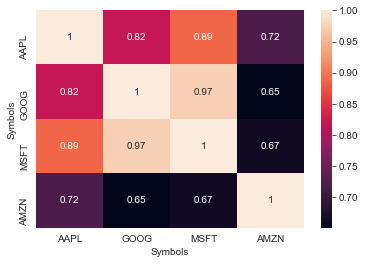

In [29]:
sns.heatmap(closing_df.corr().dropna(),annot=True)

In [30]:
# Risk Analysis.



#There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

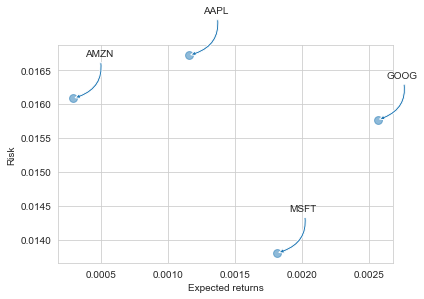

In [54]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20  #To see the area of the circle in the plot.

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (40,40),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3, rad=-0.5'))

In [58]:
#Value at Risk
#Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval

#Value at risk using the "bootstrap" method

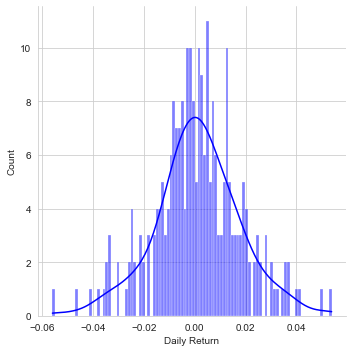

In [60]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='blue',kde=True)

In [61]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.02630397738661704

In [62]:
#The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

In [63]:
rets['MSFT'].quantile(0.05)

-0.02107254038091248

In [64]:
rets['GOOG'].quantile(0.05)

-0.020509675063828392

In [65]:
rets['AMZN'].quantile(0.05)

-0.02716478082951738

In [66]:
# Now lets use the Monte Carlo method to get value at risk of a stock

In [67]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-28,-0.046312,-0.054630,-0.049566,-0.037595
2020-10-29,0.037050,0.033377,0.010065,0.015249
2020-10-30,-0.056018,0.034309,-0.010990,-0.054456
2020-11-02,-0.000827,0.003097,-0.000692,-0.010431
2020-11-03,0.015353,0.014871,0.020264,0.014621


In [68]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GooG
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [71]:
def stock_monte_carlo(start_price,days,mu,sigma):
   

    price = np.zeros(days)
    price[0] = start_price
   
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
       
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
       
        drift[x] = mu * dt
       
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [70]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-27,1606.844971,1582.780029,1595.670044,1604.260010,1229000,1604.260010
2020-10-28,1561.349976,1514.619995,1559.739990,1516.619995,1834000,1516.619995
2020-10-29,1593.709961,1522.239990,1522.359985,1567.239990,2003100,1567.239990
2020-10-30,1687.000000,1604.459961,1672.109985,1621.010010,4329100,1621.010010
2020-11-02,1660.770020,1616.030029,1628.160034,1626.030029,2535400,1626.030029


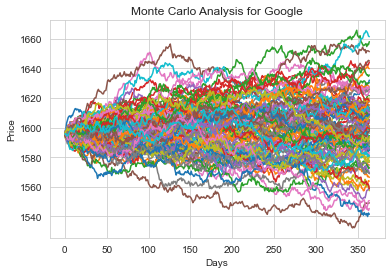

In [72]:
start_price= 1595.67

for run in range(100):
    
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    
    plt.title('Monte Carlo Analysis for Google')

In [73]:
#Lets go and make a sense of it using histogram.

In [74]:
runs=10000

simulations= np.zeros(runs)

for run in range(runs):
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

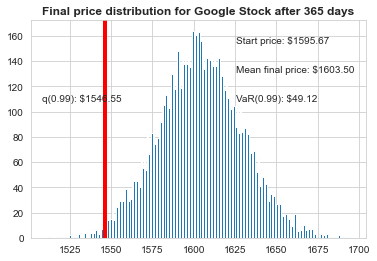

In [79]:
q= np.percentile(simulations,1)

plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(x=0.6,y=0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(x=0.6,y= 0.7, s="Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(x=0.6, y=0.6,s= "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(x=0.15, y=0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');